## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0715 21:43:46.302668  8356 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0715 21:43:46.303970  8356 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0715 21:43:46.398129  8356 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 21:43:46.402228  8356 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0715 21:43:46.770538  8356 deprecation.py:323] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 220us/step - loss: 14.2723 - acc: 0.0995 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 190us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 186us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 10s 198us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 196us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 200us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 204us/step - loss: 14.5063 - acc: 0.1000 - 

50000/50000 [==============================] - 10s 210us/step - loss: 1.8222 - acc: 0.3506 - val_loss: 1.8207 - val_acc: 0.3533
Epoch 2/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5954 - acc: 0.4334 - val_loss: 1.5663 - val_acc: 0.4353
Epoch 3/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5081 - acc: 0.4638 - val_loss: 1.4930 - val_acc: 0.4683
Epoch 4/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.4446 - acc: 0.4864 - val_loss: 1.4958 - val_acc: 0.4691
Epoch 5/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.4010 - acc: 0.5023 - val_loss: 1.4855 - val_acc: 0.4691
Epoch 6/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.3632 - acc: 0.5148 - val_loss: 1.4486 - val_acc: 0.4868
Epoch 7/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.3246 - acc: 0.5299 - val_loss: 1.4379 - val_acc: 0.4970
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.8029 - acc: 0.3676 - val_loss: 1.7591 - val_acc: 0.3834
Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7209 - acc: 0.3957 - val_loss: 1.7023 - val_acc: 0.3944
Epoch 4/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.6623 - acc: 0.4164 - val_loss: 1.6384 - val_acc: 0.4264
Epoch 5/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.6147 - acc: 0.4356 - val_loss: 1.6085 - val_acc: 0.4403
Epoch 6/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.5773 - acc: 0.4480 - val_loss: 1.5707 - val_acc: 0.4499
Epoch 7/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5430 - acc: 0.4585 - val_loss: 1.5474 - val_acc: 0.4508
Epoch 8/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5139 - acc: 0.4692 - val_loss: 1.5293 - val_acc: 0.4595
Epoch 9/50
50000/50000 [=====

Epoch 3/50
50000/50000 [==============================] - 9s 179us/step - loss: 2.0381 - acc: 0.2801 - val_loss: 2.0080 - val_acc: 0.2931
Epoch 4/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.9827 - acc: 0.2987 - val_loss: 1.9622 - val_acc: 0.3132
Epoch 5/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.9421 - acc: 0.3185 - val_loss: 1.9272 - val_acc: 0.3248
Epoch 6/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.9102 - acc: 0.3316 - val_loss: 1.8987 - val_acc: 0.3368
Epoch 7/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.8838 - acc: 0.3430 - val_loss: 1.8755 - val_acc: 0.3468
Epoch 8/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.8621 - acc: 0.3509 - val_loss: 1.8557 - val_acc: 0.3524
Epoch 9/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.8433 - acc: 0.3575 - val_loss: 1.8388 - val_acc: 0.3560
Epoch 10/50
50000/50000 [=========

Epoch 4/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2504 - acc: 0.1615 - val_loss: 2.2443 - val_acc: 0.1700
Epoch 5/50
50000/50000 [==============================] - 10s 190us/step - loss: 2.2368 - acc: 0.1814 - val_loss: 2.2316 - val_acc: 0.1850
Epoch 6/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2244 - acc: 0.1937 - val_loss: 2.2199 - val_acc: 0.1985
Epoch 7/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.2128 - acc: 0.2053 - val_loss: 2.2087 - val_acc: 0.2110
Epoch 8/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.2017 - acc: 0.2165 - val_loss: 2.1978 - val_acc: 0.2232
Epoch 9/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.1908 - acc: 0.2241 - val_loss: 2.1870 - val_acc: 0.2329
Epoch 10/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.1800 - acc: 0.2320 - val_loss: 2.1764 - val_acc: 0.2359
Epoch 11/50
50000/50000 [======

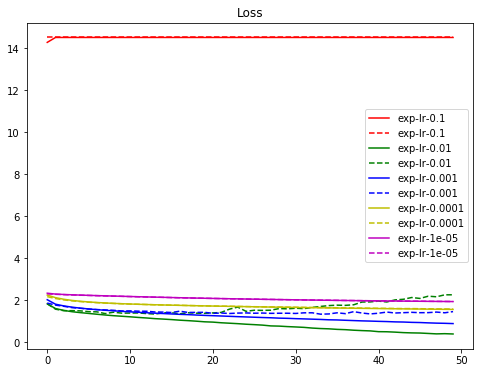

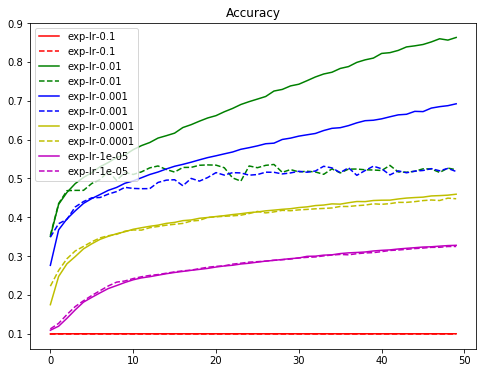

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現